In [770]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# read the kick dataset
df = pd.read_csv('kick.csv')
# show all columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41432 non-null  float64
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

C:\Users\mjcas\AppData\Local\Temp\ipykernel_26964\2360650821.py:6: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kick.csv')


In [771]:
# get the value count of each make
print("Raw count of car makes that are considered bad or not bad purchases")
print(df.groupby(['IsBadBuy'])['Make'].value_counts())


# add normalisation to get the relative frequency
print("Normalised count (percentage) of car makes that are considered bad or not bad purchases")
print(df.groupby(['IsBadBuy'])['Make'].value_counts(normalize=True))

Raw count of car makes that are considered bad or not bad purchases
IsBadBuy  Make      
0         CHEVROLET     8587
          DODGE         6567
          FORD          5387
          CHRYSLER      4561
          PONTIAC       2073
          KIA           1166
          SATURN        1060
          NISSAN        1002
          JEEP           825
          HYUNDAI        821
          SUZUKI         718
          TOYOTA         592
          MITSUBISHI     499
          MAZDA          451
          MERCURY        423
          BUICK          351
          GMC            310
          HONDA          227
          OLDSMOBILE     115
          ISUZU           75
          SCION           70
          VOLKSWAGEN      61
          LINCOLN         37
          INFINITI        17
          CADILLAC        14
          SUBARU          14
          ACURA           12
          VOLVO           12
          MINI            11
          LEXUS            9
1         FORD          1071
          CH

In [772]:
df['VehYear'].value_counts()

VehYear
2006.0    9630
2005.0    8682
2007.0    6514
2004.0    5792
2008.0    4177
2003.0    3554
2002.0    1879
2001.0     816
2009.0     387
2010.0       1
Name: count, dtype: int64

In [773]:
# Fill missing/NaN values with the mean value across the columns.
df['VehYear']=df['VehYear'].fillna(df['VehYear'].mean())

In [774]:
df['VehYear'].value_counts()

VehYear
2006.000000    9630
2005.000000    8682
2007.000000    6514
2004.000000    5792
2008.000000    4177
2003.000000    3554
2002.000000    1879
2001.000000     816
2009.000000     387
2005.360615      44
2010.000000       1
Name: count, dtype: int64

In [775]:
df['VehYear'] = df['VehYear'].astype(int)

In [776]:
df['VehYear'].value_counts()

VehYear
2006    9630
2005    8726
2007    6514
2004    5792
2008    4177
2003    3554
2002    1879
2001     816
2009     387
2010       1
Name: count, dtype: int64

In [777]:
df['MMRAcquisitionAuctionAveragePrice'].value_counts()

MMRAcquisitionAuctionAveragePrice
0        502
5480     205
6311      96
7811      79
7644      74
        ... 
11917      1
9634       1
9844       1
9887       1
7535       1
Name: count, Length: 9271, dtype: int64

In [778]:
mask = (df['MMRAcquisitionAuctionAveragePrice'] == "?") | (df['MMRAcquisitionAuctionAveragePrice'] == "0")
df.loc[mask, 'MMRAcquisitionAuctionAveragePrice'] = np.nan

In [779]:
df['MMRAcquisitionAuctionAveragePrice'].value_counts()

MMRAcquisitionAuctionAveragePrice
5480     205
6311      96
7811      79
7644      74
7991      72
        ... 
10099      1
9971       1
9761       1
10363      1
7535       1
Name: count, Length: 9269, dtype: int64

In [780]:
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].astype(float)

In [781]:
df['MMRAcquisitionAuctionAveragePrice']=df['MMRAcquisitionAuctionAveragePrice'].fillna(df['MMRAcquisitionAuctionAveragePrice'].mean())

In [782]:
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].astype(int)

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [784]:
df['MMRAcquisitionAuctionCleanPrice'].value_counts()

MMRAcquisitionAuctionCleanPrice
0        415
6461     207
7450     100
1         87
8258      81
        ... 
2844       1
2564       1
13826      1
3124       1
5714       1
Name: count, Length: 10010, dtype: int64

In [785]:
mask = (df['MMRAcquisitionAuctionCleanPrice'] == "?") | (df['MMRAcquisitionAuctionCleanPrice'] == "0") | (df['MMRAcquisitionAuctionCleanPrice'] == "1")
df.loc[mask, 'MMRAcquisitionAuctionCleanPrice'] = np.nan

In [786]:
df['MMRAcquisitionAuctionCleanPrice'].value_counts()

MMRAcquisitionAuctionCleanPrice
6461     207
7450     100
8258      81
8892      74
6584      67
        ... 
6242       1
12195      1
5748       1
10889      1
5714       1
Name: count, Length: 10007, dtype: int64

In [787]:
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].astype(float)
df['MMRAcquisitionAuctionCleanPrice']=df['MMRAcquisitionAuctionCleanPrice'].fillna(df['MMRAcquisitionAuctionCleanPrice'].mean())

In [788]:
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].astype(int)

In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [790]:
df['MMRAcquisitionRetailAveragePrice'].value_counts()

MMRAcquisitionRetailAveragePrice
0        502
6418     206
7316      96
11114     81
8756      77
        ... 
5313       1
5838       1
3171       1
3457       1
2656       1
Name: count, Length: 11070, dtype: int64

In [791]:
mask = (df['MMRAcquisitionRetailAveragePrice'] == "?") | (df['MMRAcquisitionRetailAveragePrice'] == "0")
df.loc[mask, 'MMRAcquisitionRetailAveragePrice'] = np.nan

In [792]:
df['MMRAcquisitionRetailAveragePrice'].value_counts()

MMRAcquisitionRetailAveragePrice
6418     206
7316      96
11114     81
8756      77
6515      68
        ... 
15719      1
13175      1
14336      1
15411      1
2656       1
Name: count, Length: 11068, dtype: int64

In [793]:
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].astype(float)
df['MMRAcquisitionRetailAveragePrice']=df['MMRAcquisitionRetailAveragePrice'].fillna(df['MMRAcquisitionRetailAveragePrice'].mean())
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].astype(int)

In [794]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [795]:
df['MMRAcquisitonRetailCleanPrice'].value_counts()

MMRAcquisitonRetailCleanPrice
0        501
7478     207
8546      94
11562     80
10103     69
        ... 
14881      1
15449      1
15770      1
13458      1
4937       1
Name: count, Length: 11583, dtype: int64

In [796]:
mask = (df['MMRAcquisitonRetailCleanPrice'] == "?") | (df['MMRAcquisitonRetailCleanPrice'] == "0")
df.loc[mask, 'MMRAcquisitonRetailCleanPrice'] = np.nan

In [797]:
df['MMRAcquisitonRetailCleanPrice'].value_counts()

MMRAcquisitonRetailCleanPrice
7478     207
8546      94
11562     80
10103     69
7611      67
        ... 
15201      1
18689      1
20412      1
19929      1
4937       1
Name: count, Length: 11581, dtype: int64

In [798]:
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].astype(float)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].fillna(df['MMRAcquisitonRetailCleanPrice'].mean())
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].astype(int)

In [799]:
df['MMRAcquisitonRetailCleanPrice'].value_counts()

MMRAcquisitonRetailCleanPrice
9918     660
7478     207
8546      94
11562     80
10103     69
        ... 
14881      1
15449      1
15770      1
13458      1
4937       1
Name: count, Length: 11581, dtype: int64

In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [801]:
df['MMRCurrentAuctionAveragePrice'].value_counts()

MMRCurrentAuctionAveragePrice
0        287
?        184
5480     160
6311      78
7269      75
        ... 
10577      1
9964       1
5254       1
11460      1
7730       1
Name: count, Length: 9183, dtype: int64

In [802]:
mask = (df['MMRCurrentAuctionAveragePrice'] == "?") | (df['MMRCurrentAuctionAveragePrice'] == "0")
df.loc[mask, 'MMRCurrentAuctionAveragePrice'] = np.nan
df['MMRCurrentAuctionAveragePrice'].value_counts()

MMRCurrentAuctionAveragePrice
5480     160
6311      78
7269      75
8186      71
8033      66
        ... 
2255       1
11553      1
10739      1
4015       1
7730       1
Name: count, Length: 9181, dtype: int64

In [803]:
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].astype(float)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].fillna(df['MMRCurrentAuctionAveragePrice'].mean())
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].astype(int)
df['MMRCurrentAuctionAveragePrice'].value_counts()

MMRCurrentAuctionAveragePrice
6190     519
5480     160
6311      78
7269      75
8186      71
        ... 
8204       1
10577      1
9964       1
5254       1
7730       1
Name: count, Length: 9181, dtype: int64

In [804]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [805]:
df['MMRCurrentAuctionCleanPrice'].value_counts()

MMRCurrentAuctionCleanPrice
0        206
?        184
6461     163
1         81
7450      77
        ... 
12678      1
1739       1
12894      1
3778       1
15015      1
Name: count, Length: 9890, dtype: int64

In [806]:
mask = (df['MMRCurrentAuctionCleanPrice'] == "?") | (df['MMRCurrentAuctionCleanPrice'] == "0") | (df['MMRCurrentAuctionCleanPrice'] == "1")
df.loc[mask, 'MMRCurrentAuctionCleanPrice'] = np.nan
df['MMRCurrentAuctionCleanPrice'].value_counts()

MMRCurrentAuctionCleanPrice
6461     163
7450      77
8892      66
7898      58
8107      56
        ... 
11994      1
9704       1
10014      1
11828      1
15015      1
Name: count, Length: 9887, dtype: int64

In [807]:
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].astype(float)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].fillna(df['MMRCurrentAuctionCleanPrice'].mean())
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].astype(int)
df['MMRCurrentAuctionCleanPrice'].value_counts()

MMRCurrentAuctionCleanPrice
7453     527
6461     163
7450      77
8892      66
7898      58
        ... 
11994      1
9704       1
10014      1
11828      1
15015      1
Name: count, Length: 9887, dtype: int64

In [808]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [809]:
df['MMRCurrentRetailAveragePrice'].value_counts()

MMRCurrentRetailAveragePrice
0        287
?        184
6418     157
7316      77
8756      65
        ... 
12881      1
9455       1
13549      1
9049       1
17619      1
Name: count, Length: 10935, dtype: int64

In [810]:
mask = (df['MMRCurrentRetailAveragePrice'] == "?") | (df['MMRCurrentRetailAveragePrice'] == "0")
df.loc[mask, 'MMRCurrentRetailAveragePrice'] = np.nan
df['MMRCurrentRetailAveragePrice'].value_counts()

MMRCurrentRetailAveragePrice
6418     157
7316      77
8756      65
10834     57
11674     55
        ... 
11401      1
13132      1
15161      1
15066      1
17619      1
Name: count, Length: 10933, dtype: int64

In [811]:
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].astype(float)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].fillna(df['MMRCurrentRetailAveragePrice'].mean())
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].astype(int)
df['MMRCurrentRetailAveragePrice'].value_counts()

MMRCurrentRetailAveragePrice
8826     541
6418     157
7316      77
8756      65
10834     57
        ... 
11401      1
13132      1
15161      1
15066      1
17619      1
Name: count, Length: 10933, dtype: int64

In [812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [813]:
df['MMRCurrentRetailCleanPrice'].value_counts()

MMRCurrentRetailCleanPrice
0        287
?        184
7478     161
8546      75
10103     65
        ... 
4396       1
3700       1
9667       1
10165      1
14402      1
Name: count, Length: 11363, dtype: int64

In [814]:
mask = (df['MMRCurrentRetailCleanPrice'] == "?") | (df['MMRCurrentRetailCleanPrice'] == "0")
df.loc[mask, 'MMRCurrentRetailCleanPrice'] = np.nan
df['MMRCurrentRetailCleanPrice'].value_counts()

MMRCurrentRetailCleanPrice
7478     161
8546      75
10103     65
12387     59
7611      57
        ... 
5536       1
4026       1
3054       1
13145      1
14402      1
Name: count, Length: 11361, dtype: int64

In [815]:
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].astype(float)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].fillna(df['MMRCurrentRetailAveragePrice'].mean())
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].astype(int)
df['MMRCurrentRetailCleanPrice'].value_counts()

MMRCurrentRetailCleanPrice
8826     549
7478     161
8546      75
10103     65
12387     59
        ... 
5536       1
4026       1
3054       1
13145      1
14402      1
Name: count, Length: 11361, dtype: int64

In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [817]:
df['MMRCurrentRetailRatio'].value_counts()

MMRCurrentRetailRatio
#VALUE!        178
0.858250869    156
0.856073017     74
0.866673265     62
0.949268378     53
              ... 
0.861502347      1
0.864877861      1
0.782296307      1
0.889489619      1
0.90246112       1
Name: count, Length: 25870, dtype: int64

In [818]:
mask = (df['MMRCurrentRetailRatio'] == "#VALUE!")
df.loc[mask, 'MMRCurrentRetailRatio'] = np.nan
df['MMRCurrentRetailRatio'].value_counts()

MMRCurrentRetailRatio
0.858250869    156
0.856073017     74
0.866673265     62
0.949268378     53
0.855997898     52
              ... 
0.861502347      1
0.864877861      1
0.782296307      1
0.889489619      1
0.90246112       1
Name: count, Length: 25869, dtype: int64

In [819]:
df['MMRCurrentRetailRatio'] = ((df['MMRCurrentRetailAveragePrice']) /(df['MMRCurrentRetailCleanPrice']))

In [820]:
df['MMRCurrentRetailRatio'].value_counts()

MMRCurrentRetailRatio
1.000000    539
0.858251    156
0.856073     74
0.866673     62
0.949268     53
           ... 
0.861502      1
0.864878      1
0.782296      1
0.889490      1
0.902461      1
Name: count, Length: 25869, dtype: int64

In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41432 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [822]:
df['Transmission'].value_counts()

Transmission
AUTO      39930
MANUAL     1495
?             6
Manual        1
Name: count, dtype: int64

In [823]:
mask = (df['Transmission'] == "?") | (df['MMRCurrentRetailAveragePrice'] == " ")
df.loc[mask, 'Transmission'] = np.nan
df['Transmission'] = df['Transmission'].replace('Manual', 'MANUAL')
df['Transmission'].value_counts()

Transmission
AUTO      39930
MANUAL     1496
Name: count, dtype: int64

In [824]:
df['Transmission'].mode()

0    AUTO
Name: Transmission, dtype: object

In [825]:
df['Transmission'] = df['Transmission'].fillna(df['Transmission'].mode().iloc[0])

In [826]:
df['Transmission'].value_counts()

Transmission
AUTO      39980
MANUAL     1496
Name: count, dtype: int64

In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41476 non-null  object 
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [828]:
transmission_map ={'AUTO':0,'MANUAL':1}
df['Transmission'] = df['Transmission'].map(transmission_map)

In [829]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41476 non-null  int64  
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [830]:
df['PRIMEUNIT'].value_counts()

PRIMEUNIT
?      39634
NO      1764
YES       34
Name: count, dtype: int64

In [831]:
df['PRIMEUNIT'] = df['PRIMEUNIT'].replace("?", "UNKNOWN")
mask = (df['PRIMEUNIT'] == "0")
df.loc[mask, 'Transmission'] = np.nan

In [832]:
df['PRIMEUNIT'].value_counts()

PRIMEUNIT
UNKNOWN    39634
NO          1764
YES           34
Name: count, dtype: int64

In [833]:
df['PRIMEUNIT'].mode()

0    UNKNOWN
Name: PRIMEUNIT, dtype: object

In [834]:
df['PRIMEUNIT'] = df['PRIMEUNIT'].fillna(df['PRIMEUNIT'].mode().iloc[0])
df['PRIMEUNIT'].value_counts()

PRIMEUNIT
UNKNOWN    39678
NO          1764
YES           34
Name: count, dtype: int64

In [835]:
df['AUCGUART'].value_counts()

AUCGUART
?        39634
GREEN     1754
RED         44
Name: count, dtype: int64

In [836]:
df['AUCGUART'] = df['AUCGUART'].replace("?", "UNKNOWN")
mask = (df['AUCGUART'] == "0")
df.loc[mask, 'AUCGUART'] = np.nan

In [837]:
df['AUCGUART'].value_counts()

AUCGUART
UNKNOWN    39634
GREEN       1754
RED           44
Name: count, dtype: int64

In [838]:
df['AUCGUART'].mode()

0    UNKNOWN
Name: AUCGUART, dtype: object

In [839]:
df['AUCGUART'] = df['AUCGUART'].fillna(df['AUCGUART'].mode().iloc[0])
df['AUCGUART'].value_counts()

AUCGUART
UNKNOWN    39678
GREEN       1754
RED           44
Name: count, dtype: int64

In [840]:
df['IsOnlineSale'].value_counts()

IsOnlineSale
 0.0    31368
 0       8572
 1.0      753
-1.0      601
 1        134
 ?          2
 2.0        1
 4.0        1
Name: count, dtype: int64

In [841]:
mask = (df['IsOnlineSale'] == "?") | (df['IsOnlineSale'] == " ")
df.loc[mask, 'IsOnlineSale'] = np.nan
df['IsOnlineSale'] = df['IsOnlineSale'].replace({1.0: 1, 0.0: 0,-1: np.nan})

In [842]:
df['IsOnlineSale'].value_counts()

IsOnlineSale
0      31368
0       8572
1        753
1        134
2.0        1
4.0        1
Name: count, dtype: int64

In [843]:
mask = (df['IsOnlineSale'] == 2) | (df['IsOnlineSale'] == 4)
df.loc[mask, 'IsOnlineSale'] = np.nan
df['IsOnlineSale'].value_counts()

IsOnlineSale
0    31368
0     8572
1      753
1      134
Name: count, dtype: int64

In [844]:
df['IsOnlineSale'] = df['IsOnlineSale'].astype(float)
df['IsOnlineSale'] = df['IsOnlineSale'].fillna(df['IsOnlineSale'].mean())
df['IsOnlineSale'] = df['IsOnlineSale'].astype(int)
df['IsOnlineSale'].value_counts()

IsOnlineSale
0    40589
1      887
Name: count, dtype: int64

In [845]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41476 non-null  float64
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [846]:
df['ForSale'].value_counts()

ForSale
Yes    27402
YES     8544
yes     5524
?          3
No         2
0          1
Name: count, dtype: int64

In [847]:
df['ForSale'] = df['ForSale'].replace({"YES":"Yes","yes":"Yes"})

In [848]:
df['ForSale'].value_counts()

ForSale
Yes    41470
?          3
No         2
0          1
Name: count, dtype: int64

In [849]:
mask = (df['ForSale'] == "?") | (df['ForSale'] == "0")
df.loc[mask, 'ForSale'] = np.nan

In [850]:
df['ForSale'].value_counts()

ForSale
Yes    41470
No         2
Name: count, dtype: int64

In [851]:
df['ForSale'] = df['ForSale'].fillna(df['ForSale'].mode().iloc[0])

In [852]:
df['ForSale'].value_counts()

ForSale
Yes    41474
No         2
Name: count, dtype: int64

In [853]:
for_sale_map ={'Yes':0,'No':1}
df['ForSale'] = df['ForSale'].map(for_sale_map)

In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41476 non-null  float64
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41432 non-null  float64
 11  Nationality                        41432 non-null  obj

In [855]:
df['IsBadBuy'].value_counts()

IsBadBuy
0    36105
1     5371
Name: count, dtype: int64

In [856]:
df['VehOdo'].value_counts()

VehOdo
83962.0    6
73232.0    6
67756.0    6
79993.0    6
79600.0    6
          ..
69507.0    1
92996.0    1
78038.0    1
70239.0    1
66855.0    1
Name: count, Length: 28604, dtype: int64

In [857]:
df['VehOdo'] = df['VehOdo'].fillna(df['VehOdo'].mean())
df['VehOdo'].value_counts()

VehOdo
71300.010427    44
85884.000000     6
83962.000000     6
67622.000000     6
67953.000000     6
                ..
69507.000000     1
92996.000000     1
78038.000000     1
70239.000000     1
66855.000000     1
Name: count, Length: 28605, dtype: int64

In [858]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41476 non-null  float64
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41476 non-null  float64
 11  Nationality                        41432 non-null  obj

In [859]:
df['WarrantyCost'].value_counts()

WarrantyCost
920.0     1667
1974.0    1337
2152.0    1207
1215.0    1183
1389.0    1166
          ... 
4437.0       1
7498.0       1
2230.0       1
683.0        1
7198.0       1
Name: count, Length: 271, dtype: int64

In [860]:
df['WarrantyCost'] = df['WarrantyCost'].fillna(df['WarrantyCost'].mean())
df['WarrantyCost'].value_counts()

WarrantyCost
920.0     1667
1974.0    1337
2152.0    1207
1215.0    1183
1389.0    1166
          ... 
2172.0       1
683.0        1
1205.0       1
4982.0       1
7198.0       1
Name: count, Length: 272, dtype: int64

In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41476 non-null  float64
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41476 non-null  float64
 11  Nationality                        41432 non-null  obj

In [862]:
df['VehBCost'].value_counts()

VehBCost
7500     459
6500     267
7800     259
7200     254
7000     247
        ... 
11895      1
9916       1
11255      1
12785      1
9348       1
Name: count, Length: 1869, dtype: int64

In [863]:
mask = (df['VehBCost'] == "?") | (df['VehBCost'] == "0")
df.loc[mask, 'VehBCost'] = np.nan
df['VehBCost'].value_counts()

VehBCost
7500     459
6500     267
7800     259
7200     254
7000     247
        ... 
32300      1
3480       1
11880      1
28180      1
4506       1
Name: count, Length: 1868, dtype: int64

In [864]:
df['VehBCost'] = df['VehBCost'].astype(float)
df['VehBCost'] = df['VehBCost'].fillna(df['VehBCost'].mean())
df['VehBCost'] = df['VehBCost'].astype(int)
df['VehBCost'].value_counts()

VehBCost
7500     459
6500     267
7800     259
7200     254
7000     247
        ... 
11895      1
9916       1
11255      1
12785      1
9348       1
Name: count, Length: 1869, dtype: int64

In [865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41476 non-null  float64
 8   WheelTypeID                        41432 non-null  object 
 9   WheelType                          41380 non-null  object 
 10  VehOdo                             41476 non-null  float64
 11  Nationality                        41432 non-null  obj

In [866]:
df['WheelTypeID'].value_counts()

WheelTypeID
1    20426
2    18791
?     1775
3      437
0        3
Name: count, dtype: int64

In [867]:
mask = (df['WheelTypeID'] == "?") | (df['WheelTypeID'] == "0")
df.loc[mask, 'WheelTypeID'] = np.nan

In [868]:
df['WheelTypeID'] = df['WheelTypeID'].fillna(df['WheelTypeID'].mode().iloc[0])
df['WheelTypeID'] = df['WheelTypeID'].astype(int)
df['WheelTypeID'].value_counts()

WheelTypeID
1    22248
2    18791
3      437
Name: count, dtype: int64

In [869]:
df['WheelType'].value_counts()

WheelType
Alloy      20406
Covers     18761
?           1777
Special      436
Name: count, dtype: int64

In [870]:
mask = (df['WheelType'] == "?") | (df['WheelType'] == "0")
df.loc[mask, 'WheelType'] = np.nan
df['WheelType'] = df['WheelType'].fillna(df['WheelType'].mode().iloc[0])
df['WheelType'].value_counts()

WheelType
Alloy      22279
Covers     18761
Special      436
Name: count, dtype: int64

In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41432 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41432 non-null  object 
 6   Color                              41432 non-null  object 
 7   Transmission                       41476 non-null  float64
 8   WheelTypeID                        41476 non-null  int32  
 9   WheelType                          41476 non-null  object 
 10  VehOdo                             41476 non-null  float64
 11  Nationality                        41432 non-null  obj

In [872]:
df['Auction'].value_counts()

Auction
MANHEIM    22168
ADESA      11086
OTHER       8178
Name: count, dtype: int64

In [873]:
mask = (df['Auction'] == "?") | (df['Auction'] == "0")
df.loc[mask, 'Auction'] = np.nan
df['Auction'] = df['Auction'].fillna(df['Auction'].mode().iloc[0])
df['Auction'].value_counts()

Auction
MANHEIM    22212
ADESA      11086
OTHER       8178
Name: count, dtype: int64

In [874]:
df['Make'].value_counts()

Make
CHEVROLET     9548
DODGE         7385
FORD          6458
CHRYSLER      5259
PONTIAC       2355
KIA           1337
SATURN        1245
NISSAN        1186
JEEP           985
HYUNDAI        957
SUZUKI         842
TOYOTA         664
MITSUBISHI     569
MAZDA          532
MERCURY        527
BUICK          413
GMC            351
HONDA          263
OLDSMOBILE     146
ISUZU           82
SCION           77
VOLKSWAGEN      73
LINCOLN         54
INFINITI        27
ACURA           19
MINI            19
CADILLAC        17
SUBARU          17
LEXUS           13
VOLVO           12
Name: count, dtype: int64

In [875]:
mask = (df['Make'] == "?") | (df['Make'] == "0")
df.loc[mask, 'Make'] = np.nan
df['Make'] = df['Make'].fillna(df['Make'].mode().iloc[0])
df['Make'].value_counts()

Make
CHEVROLET     9592
DODGE         7385
FORD          6458
CHRYSLER      5259
PONTIAC       2355
KIA           1337
SATURN        1245
NISSAN        1186
JEEP           985
HYUNDAI        957
SUZUKI         842
TOYOTA         664
MITSUBISHI     569
MAZDA          532
MERCURY        527
BUICK          413
GMC            351
HONDA          263
OLDSMOBILE     146
ISUZU           82
SCION           77
VOLKSWAGEN      73
LINCOLN         54
INFINITI        27
ACURA           19
MINI            19
CADILLAC        17
SUBARU          17
LEXUS           13
VOLVO           12
Name: count, dtype: int64

In [876]:
df['Color'].value_counts()

Color
SILVER       8541
WHITE        6890
BLUE         5855
BLACK        4392
GREY         4248
RED          3661
GOLD         3059
GREEN        1796
MAROON       1039
BEIGE         894
ORANGE        255
BROWN         249
PURPLE        205
YELLOW        141
OTHER         136
NOT AVAIL      65
?               6
Name: count, dtype: int64

In [877]:
mask = (df['Color'] == "?") | (df['Color'] == "0")
df.loc[mask, 'Color'] = np.nan
df['Color'] = df['Color'].fillna(df['Color'].mode().iloc[0])
df['Color'].value_counts()

Color
SILVER       8591
WHITE        6890
BLUE         5855
BLACK        4392
GREY         4248
RED          3661
GOLD         3059
GREEN        1796
MAROON       1039
BEIGE         894
ORANGE        255
BROWN         249
PURPLE        205
YELLOW        141
OTHER         136
NOT AVAIL      65
Name: count, dtype: int64

In [878]:
df['Nationality'].value_counts()

Nationality
AMERICAN          34616
OTHER ASIAN        4474
TOP LINE ASIAN     2110
USA                 125
OTHER               104
?                     3
Name: count, dtype: int64

In [879]:
mask = (df['Nationality'] == "?") | (df['Nationality'] == "0")
df.loc[mask, 'Nationality'] = np.nan
df['Nationality'] = df['Nationality'].fillna(df['Nationality'].mode().iloc[0])
df['Nationality'].value_counts()

Nationality
AMERICAN          34663
OTHER ASIAN        4474
TOP LINE ASIAN     2110
USA                 125
OTHER               104
Name: count, dtype: int64

In [880]:
df['Size'].value_counts()

Size
MEDIUM         17540
LARGE           4968
MEDIUM SUV      4569
COMPACT         4035
VAN             3367
LARGE TRUCK     1897
SMALL SUV       1332
SPECIALTY        998
CROSSOVER        974
LARGE SUV        830
SMALL TRUCK      494
SPORTS           425
?                  3
Name: count, dtype: int64

In [881]:
mask = (df['Size'] == "?") | (df['Size'] == "0")
df.loc[mask, 'Size'] = np.nan
df['Size'] = df['Size'].fillna(df['Size'].mode().iloc[0])
df['Size'].value_counts()

Size
MEDIUM         17587
LARGE           4968
MEDIUM SUV      4569
COMPACT         4035
VAN             3367
LARGE TRUCK     1897
SMALL SUV       1332
SPECIALTY        998
CROSSOVER        974
LARGE SUV        830
SMALL TRUCK      494
SPORTS           425
Name: count, dtype: int64

In [882]:
df['TopThreeAmericanName'].value_counts()

TopThreeAmericanName
GM          14075
CHRYSLER    13627
FORD         7039
OTHER        6688
?               3
Name: count, dtype: int64

In [883]:
mask = (df['TopThreeAmericanName'] == "?") | (df['TopThreeAmericanName'] == "0")
df.loc[mask, 'TopThreeAmericanName'] = np.nan
df['TopThreeAmericanName'] = df['TopThreeAmericanName'].fillna(df['TopThreeAmericanName'].mode().iloc[0])
df['TopThreeAmericanName'].value_counts()

TopThreeAmericanName
GM          14122
CHRYSLER    13627
FORD         7039
OTHER        6688
Name: count, dtype: int64

In [884]:
df['VNST'].value_counts()

VNST
TX    9076
FL    5250
CO    3623
NC    3594
AZ    3383
CA    3268
OK    2595
SC    1662
TN    1471
GA    1287
VA    1093
MO     758
PA     700
NV     553
IN     486
MS     412
LA     349
NJ     317
NM     239
KY     230
AL     179
IL     165
UT     165
WV     137
WA     136
OR     136
NH      97
NE      26
OH      25
ID      14
NY       6
Name: count, dtype: int64

In [885]:
mask = (df['VNST'] == "?") | (df['VNST'] == "0")
df.loc[mask, 'VNST'] = np.nan
df['VNST'] = df['VNST'].fillna(df['VNST'].mode().iloc[0])
df['VNST'].value_counts()

VNST
TX    9120
FL    5250
CO    3623
NC    3594
AZ    3383
CA    3268
OK    2595
SC    1662
TN    1471
GA    1287
VA    1093
MO     758
PA     700
NV     553
IN     486
MS     412
LA     349
NJ     317
NM     239
KY     230
AL     179
IL     165
UT     165
WV     137
WA     136
OR     136
NH      97
NE      26
OH      25
ID      14
NY       6
Name: count, dtype: int64

In [886]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   Auction                            41476 non-null  object 
 4   VehYear                            41476 non-null  int32  
 5   Make                               41476 non-null  object 
 6   Color                              41476 non-null  object 
 7   Transmission                       41476 non-null  float64
 8   WheelTypeID                        41476 non-null  int32  
 9   WheelType                          41476 non-null  object 
 10  VehOdo                             41476 non-null  float64
 11  Nationality                        41476 non-null  obj

In [887]:
# Select only columns with numerical values.
numerical_columns = df.select_dtypes(include=['number'])
# Display the correlation matrix.
correlation_matrix = numerical_columns.corr()
correlation_matrix

,PurchaseID,PurchaseTimestamp,VehYear,Transmission,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,MMRCurrentRetailRatio,VehBCost,IsOnlineSale,WarrantyCost,ForSale,IsBadBuy
PurchaseID,1.000000,-0.016000,-0.036637,-0.006723,-0.023341,0.010961,-0.048078,-0.045511,-0.047320,-0.047863,-0.046271,-0.043547,-0.047883,-0.044631,-0.043228,-0.037156,-0.019115,-0.016771,-0.001867,0.021812
PurchaseTimestamp,-0.016000,1.000000,0.212045,0.047899,0.047978,0.117364,0.082160,0.082281,0.427953,0.408115,0.055153,0.058576,0.360601,0.348572,0.281526,0.144267,0.093479,-0.045020,-0.003172,0.008770
VehYear,-0.036637,0.212045,1.000000,-0.055910,0.265271,-0.299002,0.600547,0.553301,0.603574,0.561334,0.597593,0.555352,0.612541,0.572912,0.536430,0.347285,0.066626,-0.272241,-0.001446,-0.165518
Transmission,-0.006723,0.047899,-0.055910,1.000000,0.031257,-0.036304,-0.104316,-0.104296,-0.075786,-0.078039,-0.106777,-0.106676,-0.082646,-0.083936,-0.028178,-0.146637,0.008944,-0.111767,-0.001343,-0.005287
WheelTypeID,-0.023341,0.047978,0.265271,0.031257,1.000000,-0.205709,-0.085045,-0.121127,-0.062618,-0.094012,-0.078521,-0.111996,-0.060229,-0.088938,0.112964,-0.146463,-0.011395,-0.123316,0.000345,-0.119806
VehOdo,0.010961,0.117364,-0.299002,-0.036304,-0.205709,1.000000,-0.028377,0.017599,0.016609,0.053323,-0.039657,0.004324,-0.002932,0.033535,-0.189008,-0.066654,0.029727,0.412781,-0.002853,0.079383
MMRAcquisitionAuctionAveragePrice,-0.048078,0.082160,0.600547,-0.104316,-0.085045,-0.028377,1.000000,0.989605,0.902469,0.900752,0.950371,0.944398,0.882794,0.881345,0.460026,0.814840,0.053417,-0.055579,0.002533,-0.114838
MMRAcquisitionAuctionCleanPrice,-0.045511,0.082281,0.553301,-0.104296,-0.121127,0.017599,0.989605,1.000000,0.893421,0.908717,0.938417,0.947137,0.872974,0.883666,0.397836,0.812432,0.052556,-0.024384,0.003518,-0.108255
MMRAcquisitionRetailAveragePrice,-0.047320,0.427953,0.603574,-0.075786,-0.062618,0.016609,0.902469,0.893421,1.000000,0.987997,0.861199,0.857960,0.927324,0.920108,0.525631,0.775112,0.091991,-0.061431,-0.000922,-0.093041
MMRAcquisitonRetailCleanPrice,-0.047863,0.408115,0.561334,-0.078039,-0.094012,0.053323,0.900752,0.908717,0.987997,1.000000,0.857287,0.865981,0.918223,0.922588,0.467309,0.778673,0.089451,-0.033092,0.000166,-0.088424


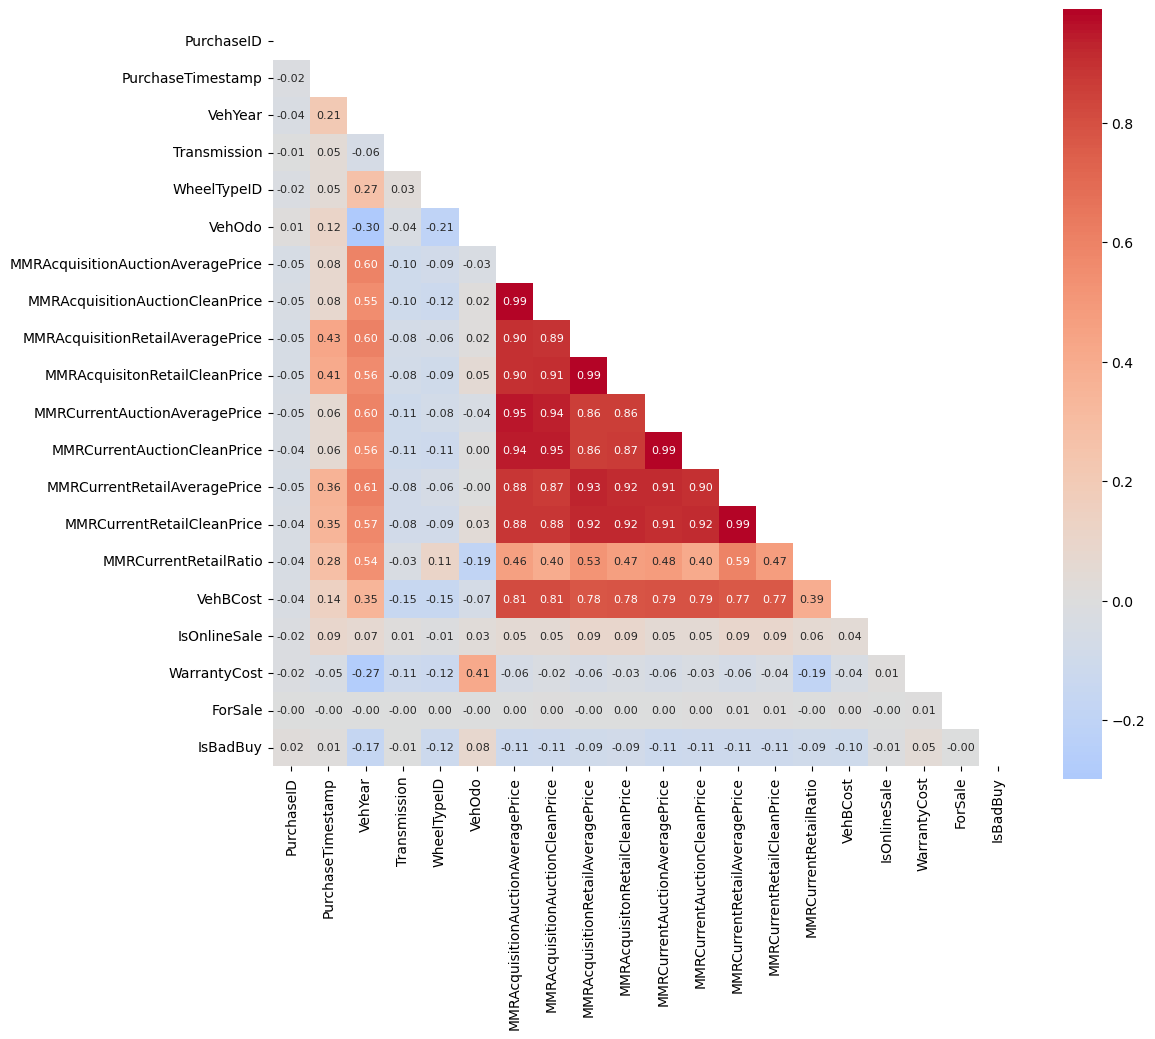

In [888]:
# Create a mask for the upper triangle to avoid duplicate data
correlation_mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",
            annot_kws={'size':8},cmap='coolwarm',
            center=0, mask=correlation_mask, square=True)
plt.show()

In [889]:
df['PRIMEUNIT'].value_counts()

PRIMEUNIT
UNKNOWN    39678
NO          1764
YES           34
Name: count, dtype: int64

In [890]:
df['Color'].value_counts()

Color
SILVER       8591
WHITE        6890
BLUE         5855
BLACK        4392
GREY         4248
RED          3661
GOLD         3059
GREEN        1796
MAROON       1039
BEIGE         894
ORANGE        255
BROWN         249
PURPLE        205
YELLOW        141
OTHER         136
NOT AVAIL      65
Name: count, dtype: int64

In [891]:
df['AUCGUART'].value_counts()

AUCGUART
UNKNOWN    39678
GREEN       1754
RED           44
Name: count, dtype: int64

In [892]:
df['IsOnlineSale'].value_counts()

IsOnlineSale
0    40589
1      887
Name: count, dtype: int64

In [893]:
df['ForSale'].value_counts()

ForSale
0    41474
1        2
Name: count, dtype: int64

In [894]:
df['Make'].value_counts()

Make
CHEVROLET     9592
DODGE         7385
FORD          6458
CHRYSLER      5259
PONTIAC       2355
KIA           1337
SATURN        1245
NISSAN        1186
JEEP           985
HYUNDAI        957
SUZUKI         842
TOYOTA         664
MITSUBISHI     569
MAZDA          532
MERCURY        527
BUICK          413
GMC            351
HONDA          263
OLDSMOBILE     146
ISUZU           82
SCION           77
VOLKSWAGEN      73
LINCOLN         54
INFINITI        27
ACURA           19
MINI            19
CADILLAC        17
SUBARU          17
LEXUS           13
VOLVO           12
Name: count, dtype: int64

In [895]:
df['Nationality'].value_counts()

Nationality
AMERICAN          34663
OTHER ASIAN        4474
TOP LINE ASIAN     2110
USA                 125
OTHER               104
Name: count, dtype: int64

In [896]:
df = pd.get_dummies(df, columns=['Auction'])
df = pd.get_dummies(df, columns=['TopThreeAmericanName'])
df = pd.get_dummies(df, columns=['Nationality'])
df = pd.get_dummies(df, columns=['Make'])
df = pd.get_dummies(df, columns=['Size'])

In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 80 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   PurchaseDate                       41476 non-null  object 
 3   VehYear                            41476 non-null  int32  
 4   Color                              41476 non-null  object 
 5   Transmission                       41476 non-null  float64
 6   WheelTypeID                        41476 non-null  int32  
 7   WheelType                          41476 non-null  object 
 8   VehOdo                             41476 non-null  float64
 9   MMRAcquisitionAuctionAveragePrice  41476 non-null  int32  
 10  MMRAcquisitionAuctionCleanPrice    41476 non-null  int32  
 11  MMRAcquisitionRetailAveragePrice   41476 non-null  int

In [899]:
df.drop(['PurchaseDate','Color','WheelType','IsOnlineSale','ForSale','PRIMEUNIT','AUCGUART'],axis=1,inplace=True)

In [900]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PurchaseID                         41476 non-null  int64  
 1   PurchaseTimestamp                  41476 non-null  int64  
 2   VehYear                            41476 non-null  int32  
 3   Transmission                       41476 non-null  float64
 4   WheelTypeID                        41476 non-null  int32  
 5   VehOdo                             41476 non-null  float64
 6   MMRAcquisitionAuctionAveragePrice  41476 non-null  int32  
 7   MMRAcquisitionAuctionCleanPrice    41476 non-null  int32  
 8   MMRAcquisitionRetailAveragePrice   41476 non-null  int32  
 9   MMRAcquisitonRetailCleanPrice      41476 non-null  int32  
 10  MMRCurrentAuctionAveragePrice      41476 non-null  int32  
 11  MMRCurrentAuctionCleanPrice        41476 non-null  int